<a href="https://colab.research.google.com/github/DrDAN6770/DataSciense-with-Python/blob/main/%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8%E5%B7%A5%E5%85%B7%E7%AE%B1/%E6%95%99%E7%B7%B4%E5%B8%B6%E8%B7%91/Task%2005/Task_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#作業01 【簡答題】特徵工程與資料視覺化

1.請問「資料清理」、「資料視覺化」與「特徵工程」在資料前處理中扮演的角色是什麼？

---

* 資料清理 : 將機器無法讀懂的資料處理掉、過濾出有用的資料、排序篩選等等，讓資料更好地被使用，產生更準確的結果
* 資料視覺化 : 將資料透過圖表的方式呈現，讓人更好閱讀、發現其價值
* 特徵工程 : 把原始數據轉變成特徵的過程，這些特徵可以很好的描述這些數據，並且利用它們建立的模型在未知數據上的表現性能可以達到最優（或者接近最佳性能）

2.你有聽過什麼叫做「不平衡資料集（Unbalanced Data）」嗎？試著舉例生活中可能存在不平衡特性的資料集。

---
案例本身負樣本就很少，導致準確率很高的情況，導致過度擬合，或是不同類別間的資料樣本數量差異過大

像是半導體良率、新冠檢測結果、罕見疾病案例等等


3.長尾理論是商業世界中一種銷售的趨勢，意旨熱門的商品銷售數量會遠大於非熱門的產品，其銷售成果如下。請問如果你的資料中遇到的這種偏移的現象，該如何處理？
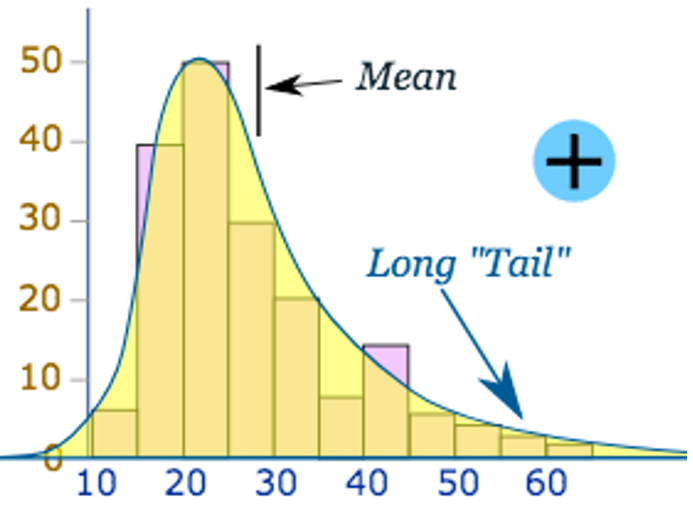
---
拖尾發生時，可以客製化商品、透過活動促銷小產品售量、藉由主流商品帶動小產品銷量(主附關係等等)、改善非主流產品性價比、廣告推銷非主流產品等等手段


4.特徵工程有一種方法稱為「裝箱法（ Binning、 Bucketization ）」，主要用於將連續資料轉成離散的型態。例如，我們可以將連續的年紀欄位（例如：3, 18, 22, 16, 28）變成「小孩」、「少年」、「中年」和「老年」四種可能的離散資料。請問什麼時候適合採用裝箱法進行資料的處理呢？

---

通常用於數值型數據，且為連續數續，可以方便定義於少量區間的數據

5.請問以下這個資料是否存在什麼問題？可以怎麼做調整？


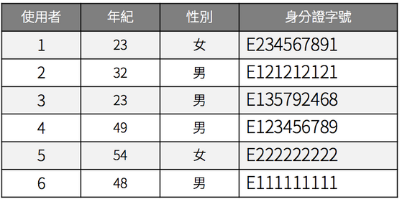

---

沒看出甚麼問題

#作業02 【實作題】特徵工程的裝箱處理

---

請根據提供的資料，將原始欄位的資料切分成由 n 個類別所組成欄位
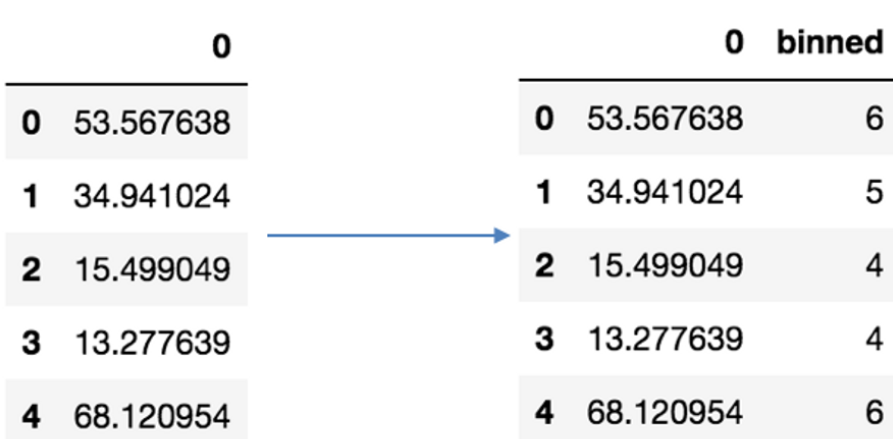

In [13]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.random(100)*100)
n = input('切分成幾類: ')
df['binned'] = pd.cut(df[0],int(n),labels=False)
# df['binned'] = pd.cut(df[0],int(n))

切分成幾類: 3


In [16]:
df
# df['binned'].value_counts()

,0,binned
0,87.755711,2
1,64.828018,1
2,13.710171,0
3,51.385179,1
4,74.908991,2
...,...,...
95,97.340211,2
96,56.146703,1
97,68.028825,2
98,15.641178,0


In [20]:
df['binned_qcut'] = pd.qcut(df[0],int(n),labels=False)
df[df['binned']!=df['binned_qcut']]
# df['binned_qcut'].value_counts()

,0,binned,binned_qcut
18,66.561431,2,1
43,42.039723,1,0
46,37.170139,1,0
63,37.680421,1,0
76,33.640074,1,0
85,66.497542,2,1


#作業 03【實作題】利用視覺化觀察資料

---

請根據提供的`iris`資料，完成以下操作：

1. 利用資料視覺化觀察 sepal 和 petal 四個欄位的關係。
2. 利用相關係數觀察 sepal 和 petal 四個欄位的關係。

In [27]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
          columns= iris['feature_names'] + ['target'])

In [22]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


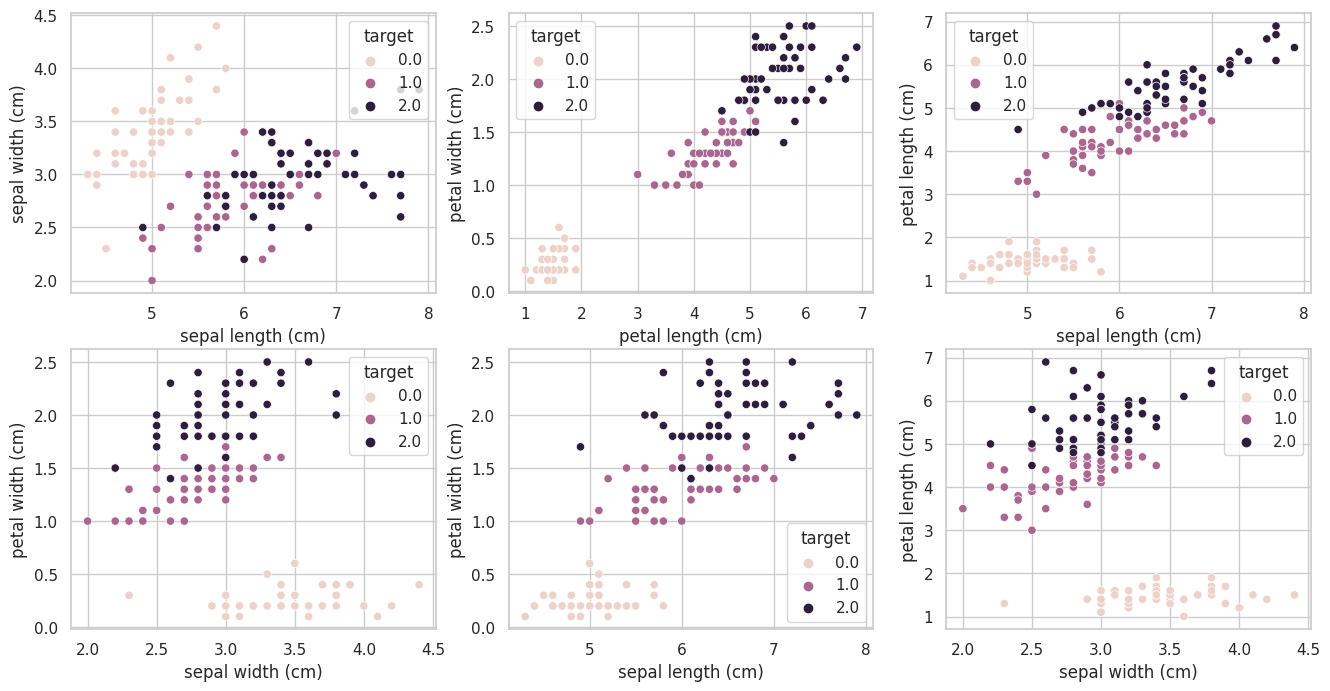

In [41]:
# 利用資料視覺化觀察 sepal 和 petal 四個欄位的關係
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
          columns= iris['feature_names'] + ['target'])

# 白底格線圖、HUSL色彩模型
sns.set_style("whitegrid")
sns.set_palette("husl")

# 2*3 組圖
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,8))

sns.scatterplot(ax=ax[0,0], x="sepal length (cm)", y="sepal width (cm)", hue="target", data=df)
sns.scatterplot(ax=ax[0,1], x="petal length (cm)", y="petal width (cm)", hue="target", data=df)
sns.scatterplot(ax=ax[0,2], x="sepal length (cm)", y="petal length (cm)", hue="target", data=df)
sns.scatterplot(ax=ax[1,0], x="sepal width (cm)", y="petal width (cm)", hue="target", data=df)
sns.scatterplot(ax=ax[1,1], x="sepal length (cm)", y="petal width (cm)", hue="target", data=df)
sns.scatterplot(ax=ax[1,2], x="sepal width (cm)", y="petal length (cm)", hue="target", data=df)

plt.show()


                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000  


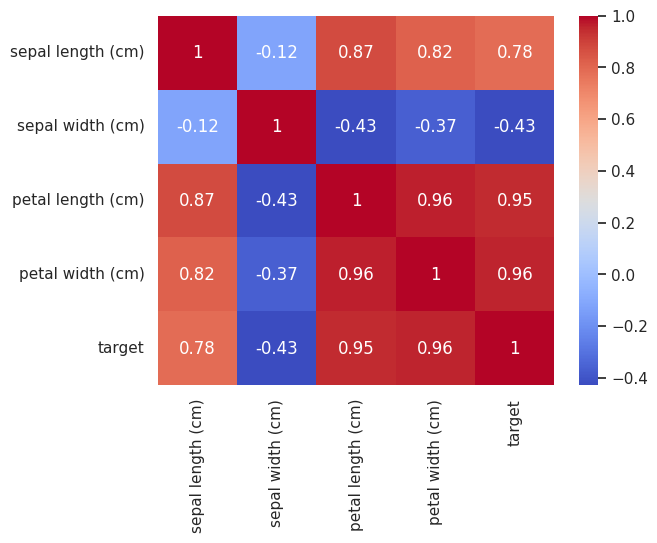

In [45]:
# 計算相關係數矩陣
corr_matrix = df.corr()
print(corr_matrix)

# 圖表化
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

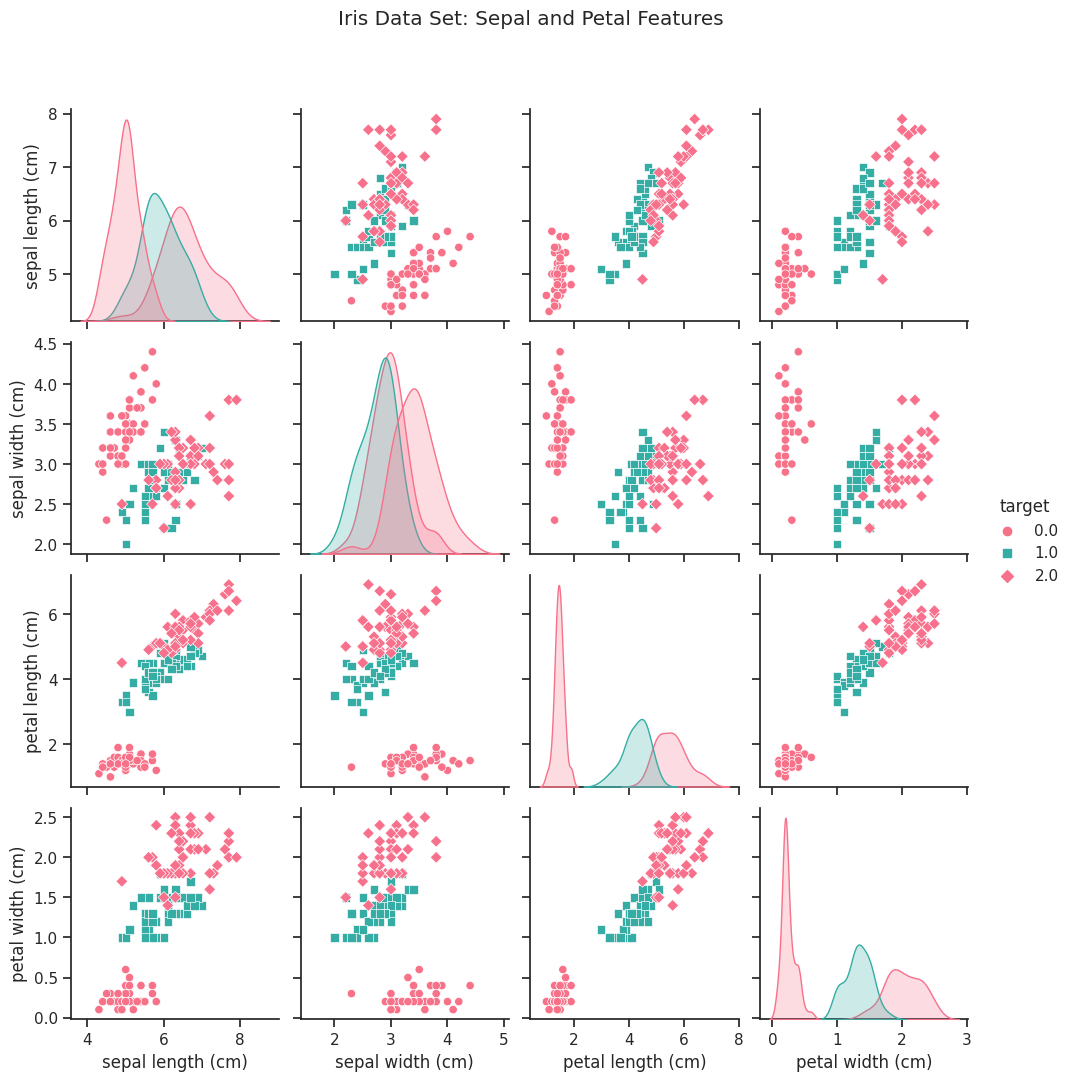

In [37]:
# 載入鳶尾花資料集
iris = load_iris()

# 將資料轉換為 DataFrame
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target'])

# 使用 Seaborn 繪製四個特徵的關係圖
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, vars=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"],
                 hue="target", palette="husl", markers=["o", "s", "D"])

# 設定圖片標題
g.fig.suptitle('Iris Data Set: Sepal and Petal Features', y=1.08)

# 顯示圖片
plt.show()